## Project 3 : Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.

For this project, we will be working to understand the results of an A/B test run by an e-commerce website.  Our goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.


<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df=pd.read_csv('ab_data.csv') # Here we read a dataset  save into variable df

b. Use the below cell to find the number of rows in the dataset.

In [3]:
rows=df.shape[0]; # Now for checking a row by using shape because shape have two indes one is for row and other is column
print('Total Number of rows in dataset ',rows) # Now display we store in


Total Number of rows in dataset  294478


c. The number of unique users in the dataset.

In [4]:
unique=df['user_id'].unique() # Now extract a unique element in user_id and save into unique variable
print('unique user',unique)


unique user [851104 804228 661590 ... 734608 697314 715931]


d. The proportion of users converted.

In [5]:
proportion=df['converted'].mean() # Now extraction a proportion of our label column name converted 
print('Proportion',proportion)


Proportion 0.11965919355605512


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [7]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


e. The number of times the `new_page` and `treatment` don't line up.

In [8]:
number_line=df[((df['landing_page']=='new_page') == (df['group']=='treatment'))==False]
number_line.shape[0]

3893

f. Do any of the rows have missing values?

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


There is no missing value in dataset because you can see on every column are non-null in output

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
#Here we create a new dataframe according to description above
df2 = df.query("(group == 'treatment' and landing_page =='new_page') or (group == 'control' and landing_page == 'old_page')")

In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
unique=df2['user_id'].nunique() # Now check unique column in new dataset 
print('unique user',unique)

unique user 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
df2[df2.duplicated(['user_id'], keep=False)]['user_id'].unique()


array([773192])

c. What is the row information for the repeat **user_id**? 

In [14]:
df2[df2.duplicated(['user_id'], keep=False)]


,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
df2=df2.drop_duplicates(['user_id']) # here we drop a duplicates row in dataset using drop_duplicates


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
df2['converted'].mean()# Now we calculate a probability of converted column 

0.11959708724499628

11 % of your data is converting regardless of the page they recieve.

b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
df2[df2['group'] == 'control']['converted'].mean()


0.1203863045004612

12 % of data who belong to control group are converting regardless of the page they recive.

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
df2[df2['group'] == 'treatment']['converted'].mean()


0.11880806551510564

d. What is the probability that an individual received the new page?

In [19]:

rows = len(df2.query("landing_page == 'new_page'"))
total_rows = df2.shape[0]
print('Probability of new pages is ',rows/total_rows)

Probability of new pages is  0.5000619442226688


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

a) Converted probability 11 %

b) Converted probability when individual belong to  control group   12 %

c) Converted Probablilty  when individual belong to   treatment group  11 %

d)Pprobability  a new pages is  50 %

From above conclusion  we can see that control group(landing_page=old_page) has more probability than treatment group(landing_page=new_page). However above information is not from original dataset and difference in probability is less which mean we can't say for sure that new page leads to conversions.Also probability of new page is 50 %  which doesn't mean all new treatment page will have more conversion.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$H_{0}$ : $p_{new}$ <= $p_{old}$

$H_{1}$ : $p_{new}$ > $p_{old}$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [20]:
p_new = df2['converted'].mean() # p_new mean probability new
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [21]:

p_old = df2['converted'].mean() # old converted probability
p_old

0.11959708724499628

c. What is $n_{new}$?

In [22]:

n_new = df2[df2['group']=='treatment'].shape[0] # get new dataset rows 
n_new

145310

d. What is $n_{old}$?

In [23]:
n_old = df2[df2['group']=='control'].shape[0] # get rows of  old dataset 
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:

new_page_converted = np.random.binomial(n_new,p_new) # apply binomial function in which two paramete pass one is n which number of samples and other is p which means is probability
new_page_converted

17436

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
old_page_converted = np.random.binomial(n_old,p_old) # apply binomial function in which two paramete pass one is n which number of samples and other is p which means is probability

old_page_converted

17400

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
new_page_converted/n_new - old_page_converted/n_old # Now find difference between new and old


0.00021807272667812017

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [27]:
p_diffs = []
for sample in range(10000):  # Now we same thing apply with 10000 trials and save into list variable name as p_diff 
    new_page_converted = np.random.binomial(n_new,p_new)
    old_page_converted = np.random.binomial(n_old, p_old)
    diff = new_page_converted/n_new - old_page_converted/n_old
    p_diffs.append(diff)
np.mean(p_diffs)  # mean of p_diffd

-8.962173853556688e-06

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([  23.,  133.,  636., 1676., 2723., 2601., 1557.,  508.,  123.,
          20.]),
 array([-4.26912494e-03, -3.40604054e-03, -2.54295614e-03, -1.67987174e-03,
        -8.16787342e-04,  4.62970574e-05,  9.09381457e-04,  1.77246586e-03,
         2.63555026e-03,  3.49863466e-03,  4.36171906e-03]),
 <a list of 10 Patch objects>)

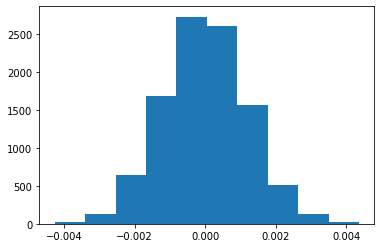

In [28]:
plt.hist(p_diffs) # now plot p_diffs in histogram 


j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [29]:
actual_diffs = df2[df2['group']=='treatment']['converted'].mean() - df2[df2['group']=='control']['converted'].mean()
print("Actual difference ",actual_diffs) #here we calculage differenee betwee actual gap and p_diffs gap 
p_diffs = np.array(p_diffs)
print("Mean or proportion of p_diffs are greater then actual difference ",(actual_diffs < p_diffs).mean())

Actual difference  -0.0015782389853555567
Mean or proportion of p_diffs are greater then actual difference  0.9079


k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?



I computed p-value to determine the statistical significance of the null hypothesis.

Observed large p-value indicates weak evidence against the null hypothesis and fails to reject the null hypothesis which suggest that the new page conversion rate is higher than the old rate

Here you should Accept the null hypothesis because the p-value is greater than 0.05 ** we Only accept Null Hypothesis when p value is greater than 0.05 **  A small p-value (typically ??? 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis but now you accept a null a hypothesis.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [30]:
import statsmodels.api as sm

convert_old = sum(df2.query("landing_page == 'old_page'")['converted'])
convert_new = sum(df2.query("landing_page == 'new_page'")['converted'])
n_old = len(df2.query("landing_page == 'old_page'"))
n_new = len(df2.query("landing_page == 'new_page'")) 

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [31]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print('z_score :: ',z_score) #  relationship to the mean (average) of a group of values, measured in terms of standard deviations from the mean. If a Z-score is 0, it indicates that the data point's score is identical to the mean score
print('p_value :: ',p_value) # p value which calculte either we accept or reject a null hypothesis


z_score ::  1.3109241984234394
p_value ::  0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [32]:
from scipy.stats import norm
# significant of z-score
print(norm.cdf(z_score))

# for our single-sides test, assumed at 95% confidence level, we calculate: 
print(norm.ppf(1-(0.05)))

0.9050583127590245
1.6448536269514722


As you can see above the value of z-score of 1.31 which is less than critical value of 1.64, So we fail to reject the null hypothesis which  means that  new page conversion rate is higher than the old rate. Since they are different, and I can agree with the findings in parts j and k.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

We will use **Logistic Regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [33]:
group_dummies = pd.get_dummies(df2['group'])
df2_new = df2.join(group_dummies)
df2_new['intercept'] = 1
df2_new.head()

,user_id,timestamp,group,landing_page,converted,control,treatment,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [34]:
import statsmodels.api as sm # add a lbrary for building a model 

logit = sm.Logit(df2_new['converted'],df2_new[['intercept','treatment']]) # our lable/Dependent variable/ Y is converted column other two are you X or Independent columns
model = logit.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [35]:
model.summary() # Here we get summary of model which shown below


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 15 Nov 2019   Pseudo R-squ.:               8.077e-06
Time:                        13:04:54   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
treatment     -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

p-value is 0.190 .The p-value here suggests that that new page is not statistically significant as 0.19 > 0.05 . In this section it was a two sided test and in Part II it was a one sided test.Here we test for not equal in our hypotheses whereas in Part II it was for different.

Hypothesis in Part III ::

$H_{0}$ : $p_{new}$ - $p_{old}$ = 0

$H_{1}$ : $p_{new}$ - $p_{old}$ != 0

Hypothesis in Part II ::

$H_{0}$ : $p_{new}$ <= $p_{old}$

$H_{1}$ : $p_{new}$ > $p_{old}$

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

There might be many factors that can effect individual converts . age group and gender can play a significant change. Also usage and access may effect the rate of conversion. We can find new trends using other factors but there may be some disadvantages like even with new factors we may miss some other influencing factors which lead to unreliable and contradictory results compared to previous results

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [36]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new

,country,timestamp,group,landing_page,converted
user_id,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0
909908,UK,2017-01-06 20:44:26.334764,treatment,new_page,0
811617,US,2017-01-02 18:42:11.851370,treatment,new_page,1
938122,US,2017-01-10 09:32:08.222716,treatment,new_page,1
887018,US,2017-01-06 11:09:40.487196,treatment,new_page,0


In [37]:

df_new['intercept'] = 1
df_new[['UK','US']] = pd.get_dummies(df_new['country'])[['UK','US']]

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [38]:
### Fit Linear Model And Obtain the Results
log = sm.Logit(df_new['converted'],df_new[['intercept','UK','US']])
results = log.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Fri, 15 Nov 2019   Pseudo R-squ.:               1.521e-05
Time:                        13:04:55   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
US             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

<a id='conclusions'></a>
## Conclusions

We can accept Null Hypothesis as there is no significant difference in conversion rates. We can reject alternate hypothesis.These results are based on given dataset. There may be limitations due to incorrect data or missing columns.

